In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import ndimage as ndi
import cv2 as cv

# Load, crop and zero-pad image

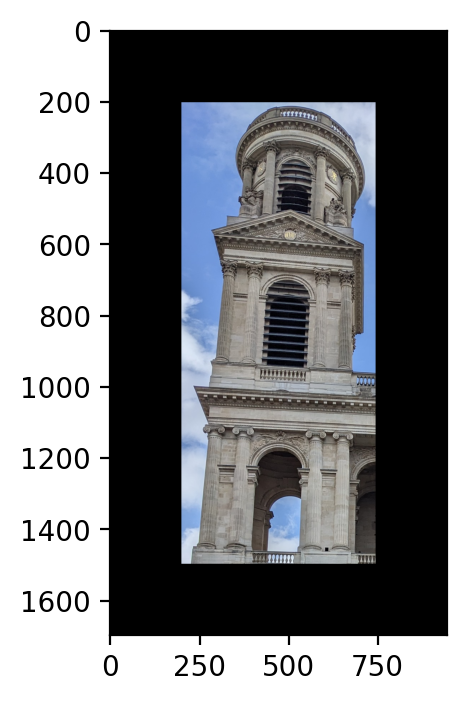

In [5]:
file_path=(r"sulpice.jpg")
im = cv.imread(file_path)
im = cv.cvtColor(im,cv.COLOR_BGR2RGB)
im_dim = im.shape
im = im[int(0*im_dim[0]):int(0.5*im_dim[0]),int(0.06*im_dim[1]):int(0.34*im_dim[1]),:]

pad_width = 200
im = np.pad(im, pad_width=[(pad_width , pad_width ),(pad_width , pad_width ),(0, 0)], mode='constant')

rows,cols,_ = im.shape

plt.figure(dpi=200)
plt.imshow(im)

# Identity

Text(0.5, 1.0, 'Identity')

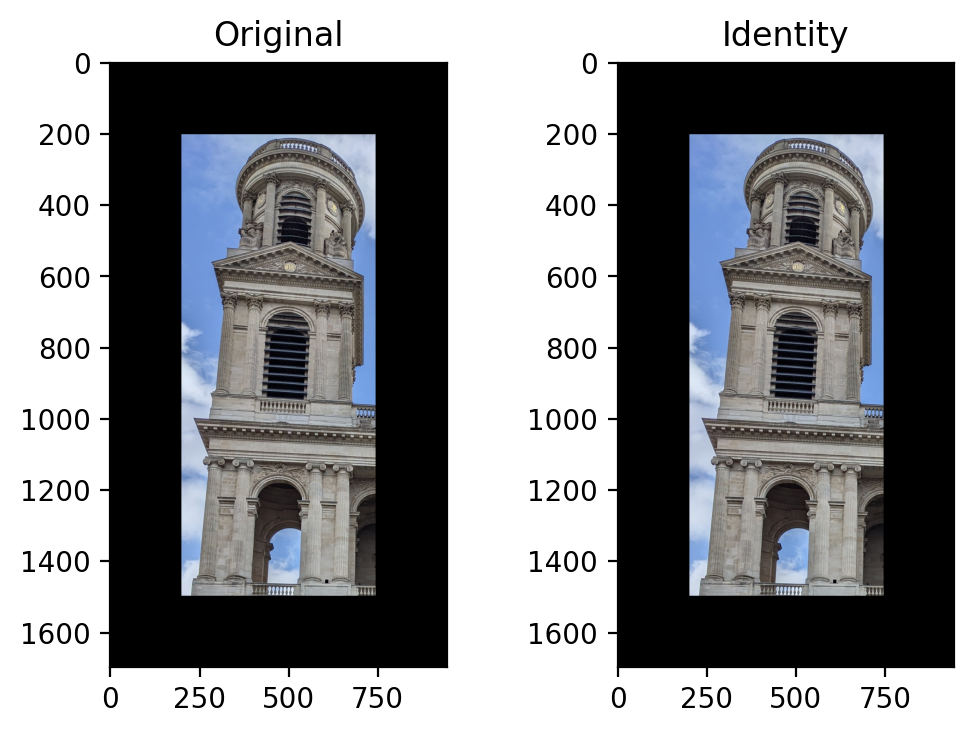

In [16]:
mat_identity = np.array([[1,0,0],
                         [0,1,0],
                         [0,0,1]])
im_id = ndi.affine_transform(im, mat_identity)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_id)
ax2.set_title("Identity")

# Reflect Vertical

Text(0.5, 1.0, 'Vertical reflection')

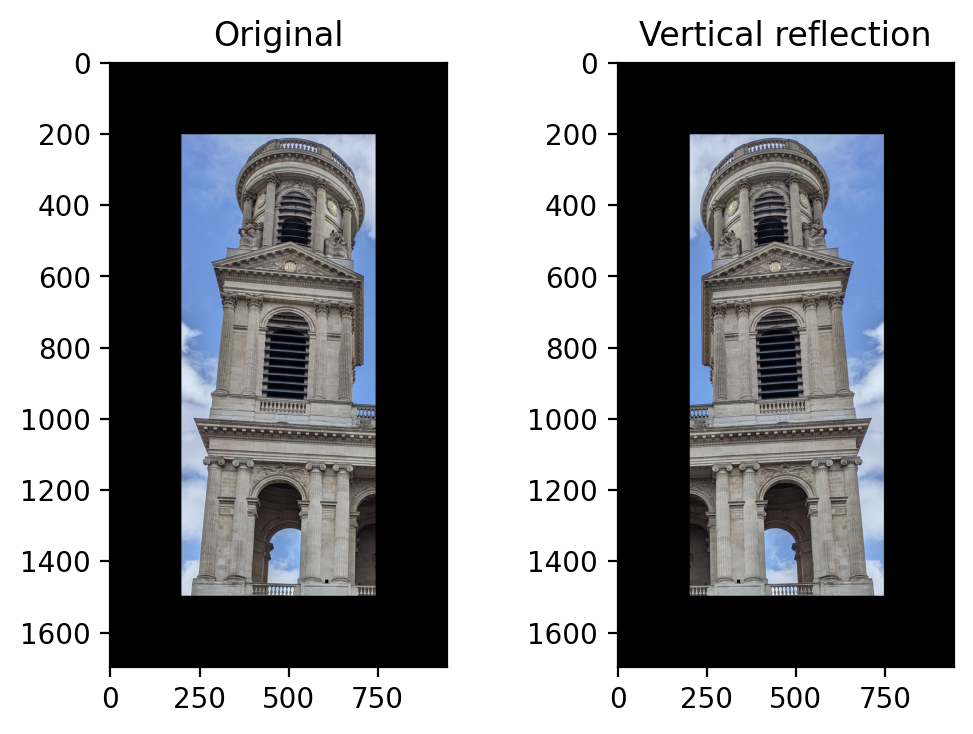

In [102]:
mat_reflect_vertical = np.array([[1,0,0],
                                [0,-1,0],
                                [0,0,1]])
im_rv = ndi.affine_transform(im, mat_reflect_vertical,offset=(0,cols,0))

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_rv)
ax2.set_title("Vertical reflection")

# Reflect hortizontal

Text(0.5, 1.0, 'Horizontal reflection')

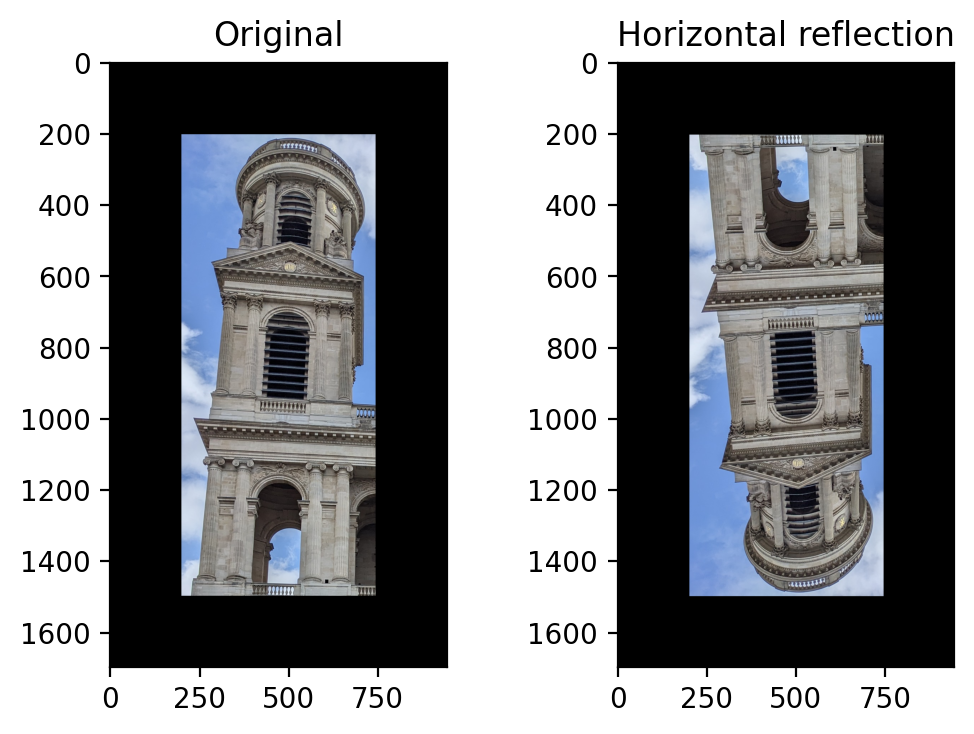

In [104]:
mat_reflect_horizontal = np.array([[-1,0,0],
                                    [0,1,0],
                                    [0,0,1]])
im_rh = ndi.affine_transform(im, mat_reflect_horizontal,offset=(rows,0,0))

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_rh)
ax2.set_title("Horizontal reflection")

# Scale

Text(0.5, 1.0, 'Scale up')

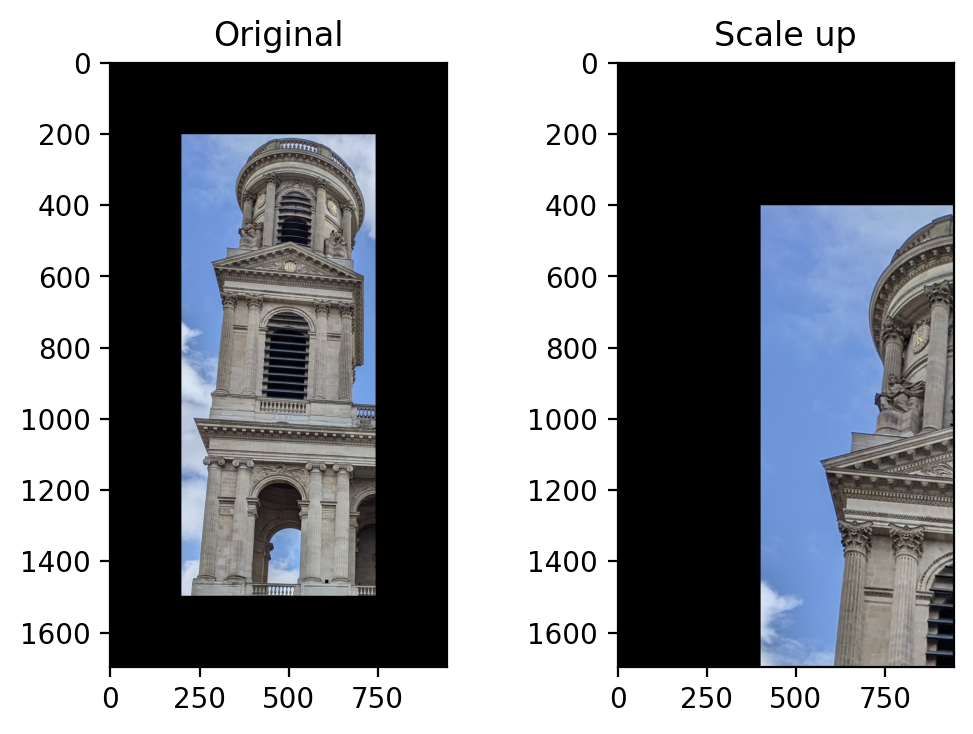

In [20]:
scale = 0.5
mat_scale = np.array([[scale,0,0],
                      [0,scale,0],
                      [0,0,1]])
im_su = ndi.affine_transform(im, mat_scale)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_su)
ax2.set_title("Scale up")

Text(0.5, 1.0, 'Scale down')

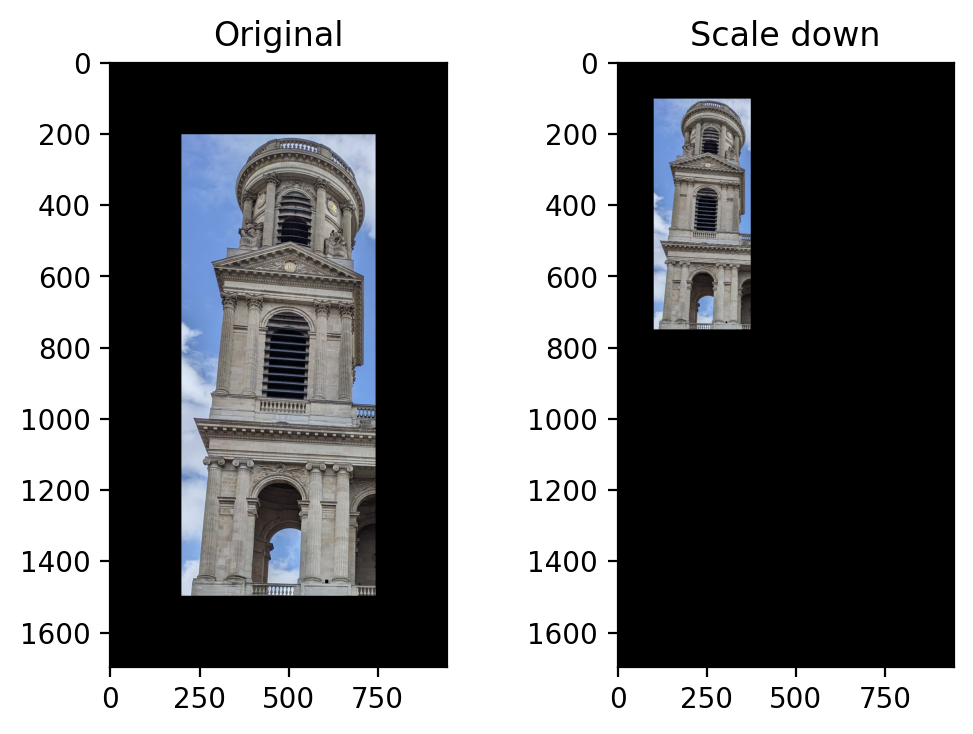

In [21]:
scale = 2
mat_scale = np.array([[scale,0,0],
                      [0,scale,0],
                      [0,0,1]])
im_sd = ndi.affine_transform(im, mat_scale)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_sd)
ax2.set_title("Scale down")

# Rotate

Text(0.5, 1.0, 'Rotate')

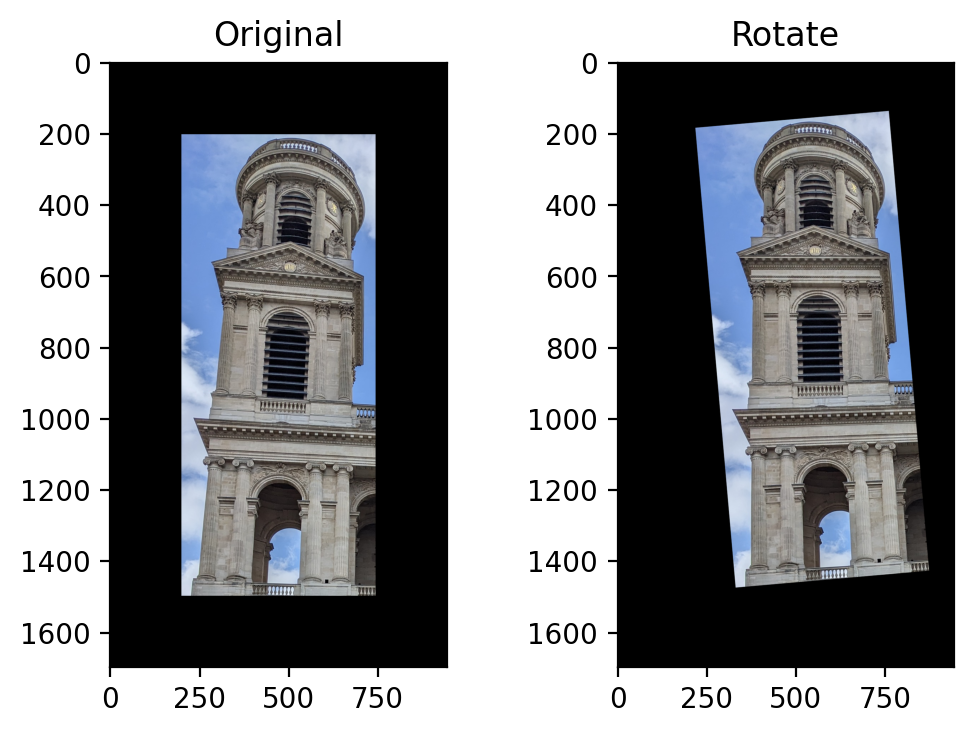

In [28]:
theta = 5*np.pi/180
mat_rotate = np.array([[np.cos(theta),np.sin(theta),0],
                       [-np.sin(theta),np.cos(theta),0],
                       [0,0,1]])
im_rot = ndi.affine_transform(im, mat_rotate)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_rot)
ax2.set_title("Rotate")

# Shear horizontal

Text(0.5, 1.0, 'Shear Horizontal')

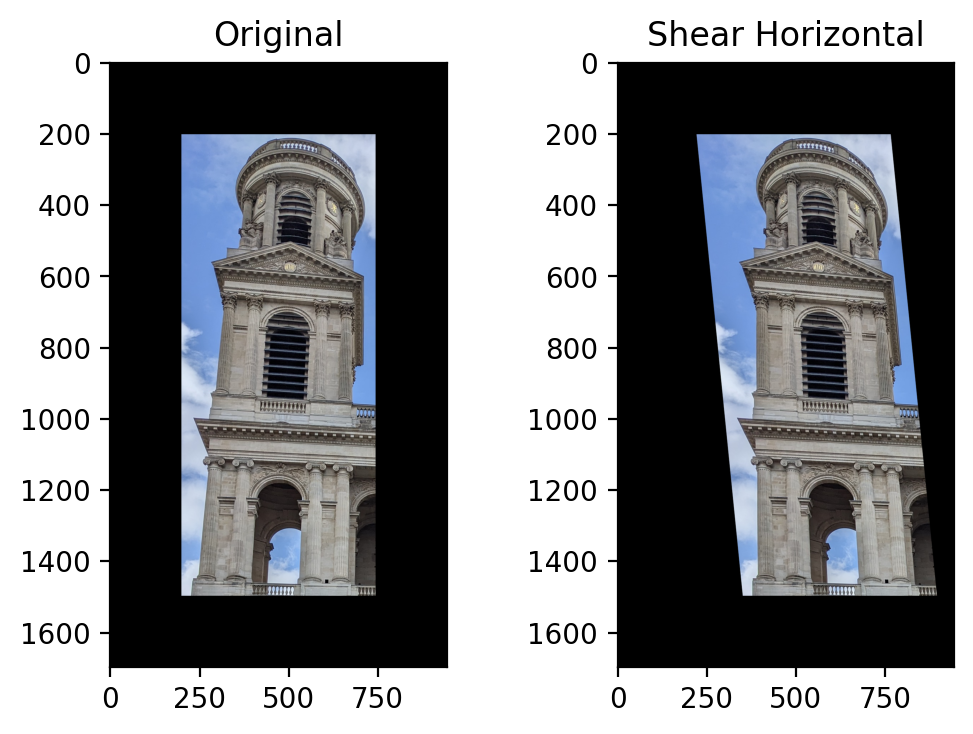

In [78]:
shear = -0.1
mat_shear_horizontal = np.array([[1,0,0],
                                 [shear,1,0],
                                 [0,0,1]])
im_sh = ndi.affine_transform(im, mat_shear_horizontal)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_sh)
ax2.set_title("Shear Horizontal")

# Shear vertical

Text(0.5, 1.0, 'Shear Vertical')

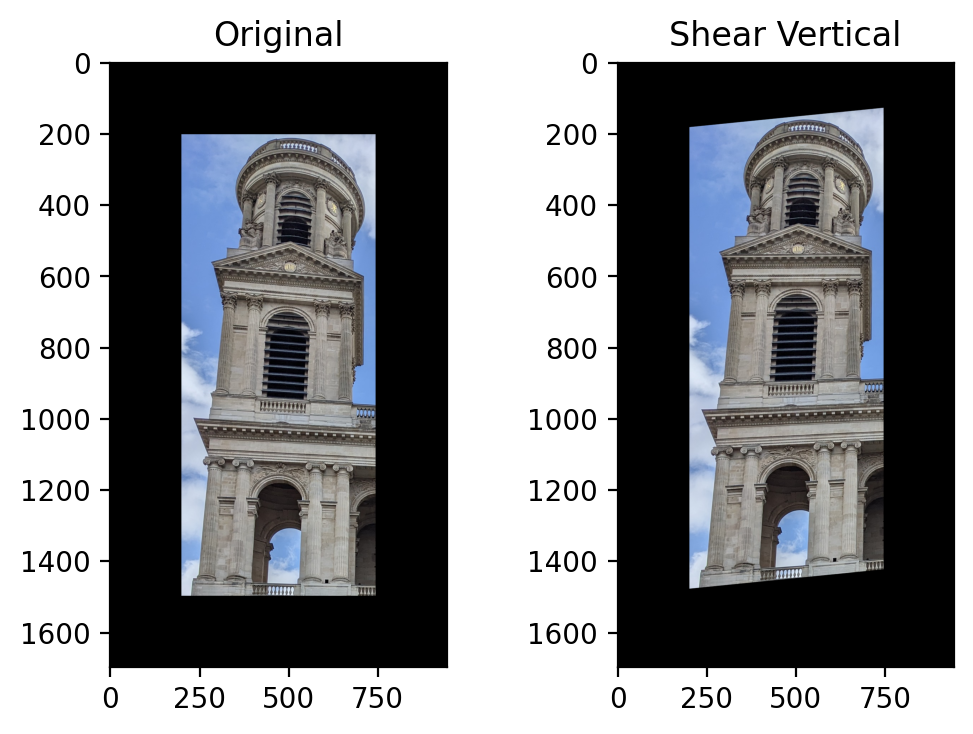

In [81]:
shear = 0.1
mat_shear_vertical = np.array([[1,shear,0],
                               [0,1,0],
                               [0,0,1]])
im_sv = ndi.affine_transform(im, mat_shear_vertical)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(im)
ax1.set_title("Original")
ax2.imshow(im_sv)
ax2.set_title("Shear Vertical")

# Combine rotate and shear

[]

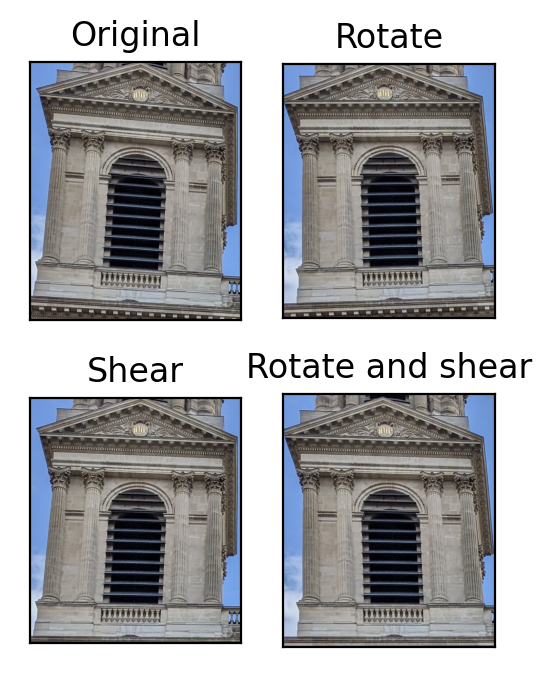

In [105]:
theta = 0.59/6.28
mat_rotate = np.array([[np.cos(theta),np.sin(theta),0],[-np.sin(theta),np.cos(theta),0],[0,0,1]])

shear = -0.035
mat_shear_horizontal = np.array([[1,shear,0],[0,1,0],[0,0,1]])

shear = 0.05
mat_shear_horizontal2 = np.array([[1,shear,0],[0,1,0],[0,0,1]])

im1 = ndi.affine_transform(im, mat_rotate)
im2 = ndi.affine_transform(im, mat_shear_horizontal2)
im3 = ndi.affine_transform(im, mat_shear_horizontal@mat_rotate)

fig, axs = plt.subplots(2, 2, figsize=(3,4), dpi=200)
axs[0,0].imshow(im)
axs[0,0].set_xlim(270,720)
axs[0,0].set_ylim(1050,500)
axs[0,0].set_title("Original")
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,1].imshow(im1)
axs[0,1].set_xlim(340,790)
axs[0,1].set_ylim(1000,460)
axs[0,1].set_title("Rotate")
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[1,0].imshow(im2)
axs[1,0].set_xlim(270,720)
axs[1,0].set_ylim(1000,480)
axs[1,0].set_title("Shear")
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,1].imshow(im3)
axs[1,1].set_xlim(340,790)
axs[1,1].set_ylim(1000,460)
axs[1,1].set_title("Rotate and shear")
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
# plt.hlines([590,990],340,790,color="k")

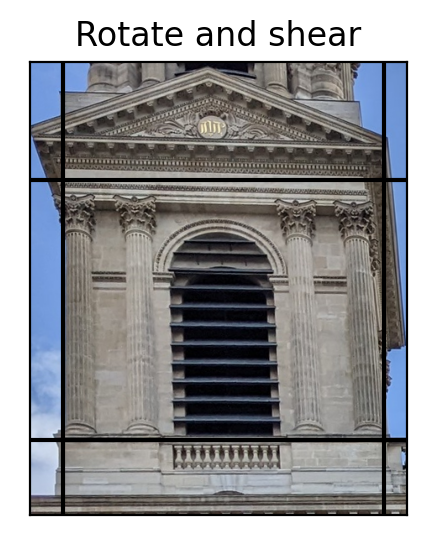

In [142]:
theta = 0.59/6.28
mat_rotate = np.array([[np.cos(theta),np.sin(theta),0],[-np.sin(theta),np.cos(theta),0],[0,0,1]])# @ np.array([[1,0,0],[0,1,-h],[0,0,1]])

shear = -0.03
mat_shear_horizontal = np.array([[1,shear,0],[0,1,0],[0,0,1]])# @ np.array([[1,0,0],[0,1,-h],[0,0,1]])

im3 = ndi.affine_transform(im, mat_shear_horizontal@mat_rotate) # offset=(0,h)

plt.figure(figsize=(4,3),dpi=200)
plt.imshow(im3)
plt.xlim(340,790)
plt.ylim(1000,460)
plt.title("Rotate and shear")
plt.xticks([])
plt.yticks([])
plt.hlines([600,910],340,790,color="k")
plt.vlines([380,762],0,2000,color="k")